In [1]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett


In [2]:
df = pd.read_csv("./datasets/전처리준비/코스닥_train_이상치처리완료.csv", index_col=0)
test = pd.read_csv("./datasets/전처리준비/코스닥_test_이상치처리완료.csv", index_col=0)


# pd.reset_option("display.max.rows", None)
df["업력"] = df["업력"].astype("float")
df["거래소코드"] = df["거래소코드"].astype("object")
df["회계년도"] = df["회계년도"].astype("object")


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 5013
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   회사명                    5014 non-null   object 
 1   거래소코드                  5014 non-null   object 
 2   회계년도                   5014 non-null   object 
 3   차입금의존도                 5014 non-null   float64
 4   부채비율                   5014 non-null   float64
 5   순운전자본비율                5014 non-null   float64
 6   산업군                    5014 non-null   object 
 7   총자본정상영업이익률             5014 non-null   float64
 8   자기자본순이익률               5014 non-null   float64
 9   총자본순이익률                5014 non-null   float64
 10  매출액총이익률                5014 non-null   float64
 11  금융비용부담률                5014 non-null   float64
 12  자본금회전률                 5014 non-null   float64
 13  유형자산회전율                5014 non-null   float64
 14  재고자산회전률                5014 non-null   float64
 15  자기자본

In [3]:
df_y = df[["target_1", "target_2", "target_3"]]
df_obj = df.select_dtypes("object")
col_int = df.select_dtypes("float").columns.to_list()

In [4]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [5]:
normal_test("kstest",df[col_int])

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                재고자산회전률
 11                자기자본회전률
 12                타인자본회전률
 13                 총자본회전률
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                     업력
 22                누적수익성비율
 23                  이자부담률
 24                 부채상환계수
 25              현금흐름 대 자산
 26             현금흐름 대 매출액
 27                    TMD
 28                 시총/총자산
 29               EBIT/총자산
 30               당기전기영업손익
 31                 FINDEP
 32              EBITDA마진율
 33                 PBR변화율
 34    

In [6]:
normal_test("shapiro",df[col_int])

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 총자본순이익률
 6                 매출액총이익률
 7                 금융비용부담률
 8                  자본금회전률
 9                 유형자산회전율
 10                재고자산회전률
 11                자기자본회전률
 12                타인자본회전률
 13                 총자본회전률
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                     업력
 22                누적수익성비율
 23                  이자부담률
 24                 부채상환계수
 25              현금흐름 대 자산
 26             현금흐름 대 매출액
 27                    TMD
 28                 시총/총자산
 29               EBIT/총자산
 30               당기전기영업손익
 31                 FINDEP
 32              EBITDA마진율
 33                 PBR변화율
 34    

In [7]:
def homoscedasticity_test(df, col,tool):
        dict = {"변수" : [], "p_val" : [], "T" : [] }           
        if tool == "levene":
                
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict["변수"].append(i)
                        dict["p_val"].append(p_val)
                        dict["T"].append(T)

                        list = pd.DataFrame(dict)
        return list


In [8]:
bartlett_결과 = homoscedasticity_test(df, ['자본금회전률','타인자본회전률','총자본회전률'],"bartlett")
bartlett_등분산 = bartlett_결과[bartlett_결과["p_val"]>0.05]
bartlett등분산변수 = bartlett_등분산.loc[:,"변수"].to_list()
bartlett등분산변수

['총자본회전률']

In [9]:
levene_결과 = homoscedasticity_test(df,col_int,"levene")
levene_등분산 = levene_결과[levene_결과["p_val"]>0.05]


levene등분산변수 = levene_등분산.loc[:,"변수"].to_list()


등분산변수target = levene등분산변수+ ["target_3"]

In [10]:
levene_비등분산 = levene_결과[levene_결과["p_val"]<0.05]
levene_비등분산target = levene_비등분산.loc[:,"변수"].to_list() + ["target_3"]

In [11]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [12]:
이분산 = t_test(df[levene_비등분산target],levene_비등분산target,"welch",alpha=0.05)
이분산t = 이분산[이분산["p_val"]<0.05]
이분산t


C:\Users\msi\AppData\Local\Temp\ipykernel_31632\2458501125.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)


,변수,p_val,t-val
0,차입금의존도,2.111261e-06,4.916893
2,순운전자본비율,2.617793e-06,-4.868642
3,총자본정상영업이익률,1.060315e-33,-15.323106
4,자기자본순이익률,4.185550e-04,-3.601767
5,총자본순이익률,3.295008e-22,-11.272223
6,매출액총이익률,8.566468e-10,-6.507566
7,금융비용부담률,2.435579e-07,5.388016
8,자본금회전률,1.120402e-27,-12.720527
10,타인자본회전률,5.096303e-38,-16.326324
11,총자본회전률,3.193321e-15,-8.649319


In [13]:
등분산 = t_test(df[등분산변수target],등분산변수target,"student",alpha=0.05)
등분산t = 등분산[등분산["p_val"]<0.05]
등분산t

C:\Users\msi\AppData\Local\Temp\ipykernel_31632\2458501125.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])


,변수,p_val,t-val
2,대주주지분율,2.802419e-31,-11.712508
4,당기전기영업손익,1.577522e-42,-13.797017
5,현금흐름/총부채비율,4.119450e-37,-12.832457
6,영업현금흐름-단기차입금,7.989702e-07,-4.941869
7,target_3,0.000000e+00,inf


In [14]:
등분산_col = 등분산t.loc[:, "변수"].to_list()
이분산_col = 이분산t.loc[:, "변수"].to_list()
의미있는_col = 이분산_col + 등분산_col

In [15]:
df_1 = df[의미있는_col]
df_1.drop(columns="target_3", axis=1, inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_31632\687291390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns="target_3", axis=1, inplace=True)


In [16]:
# VIF 출력을 위한 데이터 프레임 형성
pd.set_option("display.max.rows", None)
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,10.673625,총자본회전률
1,10.359388,타인자본회전률
2,7.649675,총자본순이익률
3,6.907012,EBIT/총자산
4,6.288477,총자본정상영업이익률
5,6.177624,차입금의존도
6,6.098336,대주주지분율
7,5.502642,현금흐름 대 자산
8,5.198963,현금흐름/총부채비율
9,4.019896,순운전자본비율


In [17]:
drop_ls = ['총자본회전률']

In [18]:
##
df_1 = df_1.drop(drop_ls,axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,7.480316,총자본순이익률
1,6.738553,EBIT/총자산
2,6.016585,총자본정상영업이익률
3,6.010710,대주주지분율
4,5.924224,타인자본회전률
5,5.396912,차입금의존도
6,5.283385,현금흐름 대 자산
7,4.569555,현금흐름/총부채비율
8,4.004889,순운전자본비율
9,3.572789,현금흐름 대 매출액


In [19]:
통계적유의_col = vif["features"].to_list() 
df_vif = pd.concat([df_obj ,df_1[통계적유의_col], df_y], axis=1)
df_vif.to_csv("./datasets/통계검증완료/코스닥_이상치+통계검증_train.csv", encoding="utf-8-sig")
test[df_vif.columns].to_csv("./datasets/통계검증완료/코스닥_이상치+통계검증_test.csv", encoding="utf-8-sig")

In [20]:
비교 =  test.columns
전체 = df_vif.columns


def find_difference(list1, list2):
    difference = []
    for item in list1:
        if item not in list2:
            difference.append(item)
    return difference

find_difference(전체,비교)


[]

In [21]:
df_vif.columns

Index(['회사명', '거래소코드', '회계년도', '산업군', '총자본순이익률', 'EBIT/총자산', '총자본정상영업이익률',
       '대주주지분율', '타인자본회전률', '차입금의존도', '현금흐름 대 자산', '현금흐름/총부채비율', '순운전자본비율',
       '현금흐름 대 매출액', 'EBITDA마진율', '매출액총이익률', '누적수익성비율',
       'abs(영업현금흐름-당기순이익)/매출액', '자본금회전률', '당기전기영업손익', '금융비용부담률',
       '영업현금흐름-단기차입금', 'TMD', '총자본증가율', 'FINDEP', '외국인지분율', '자기자본증가율',
       '매출액증가율', '정상영업이익증가율', '자기자본순이익률', 'ROA변화율', '이자부담률', 'target_1',
       'target_2', 'target_3'],
      dtype='object')

C:\Users\msi\AppData\Local\Temp\ipykernel_31632\2489820295.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

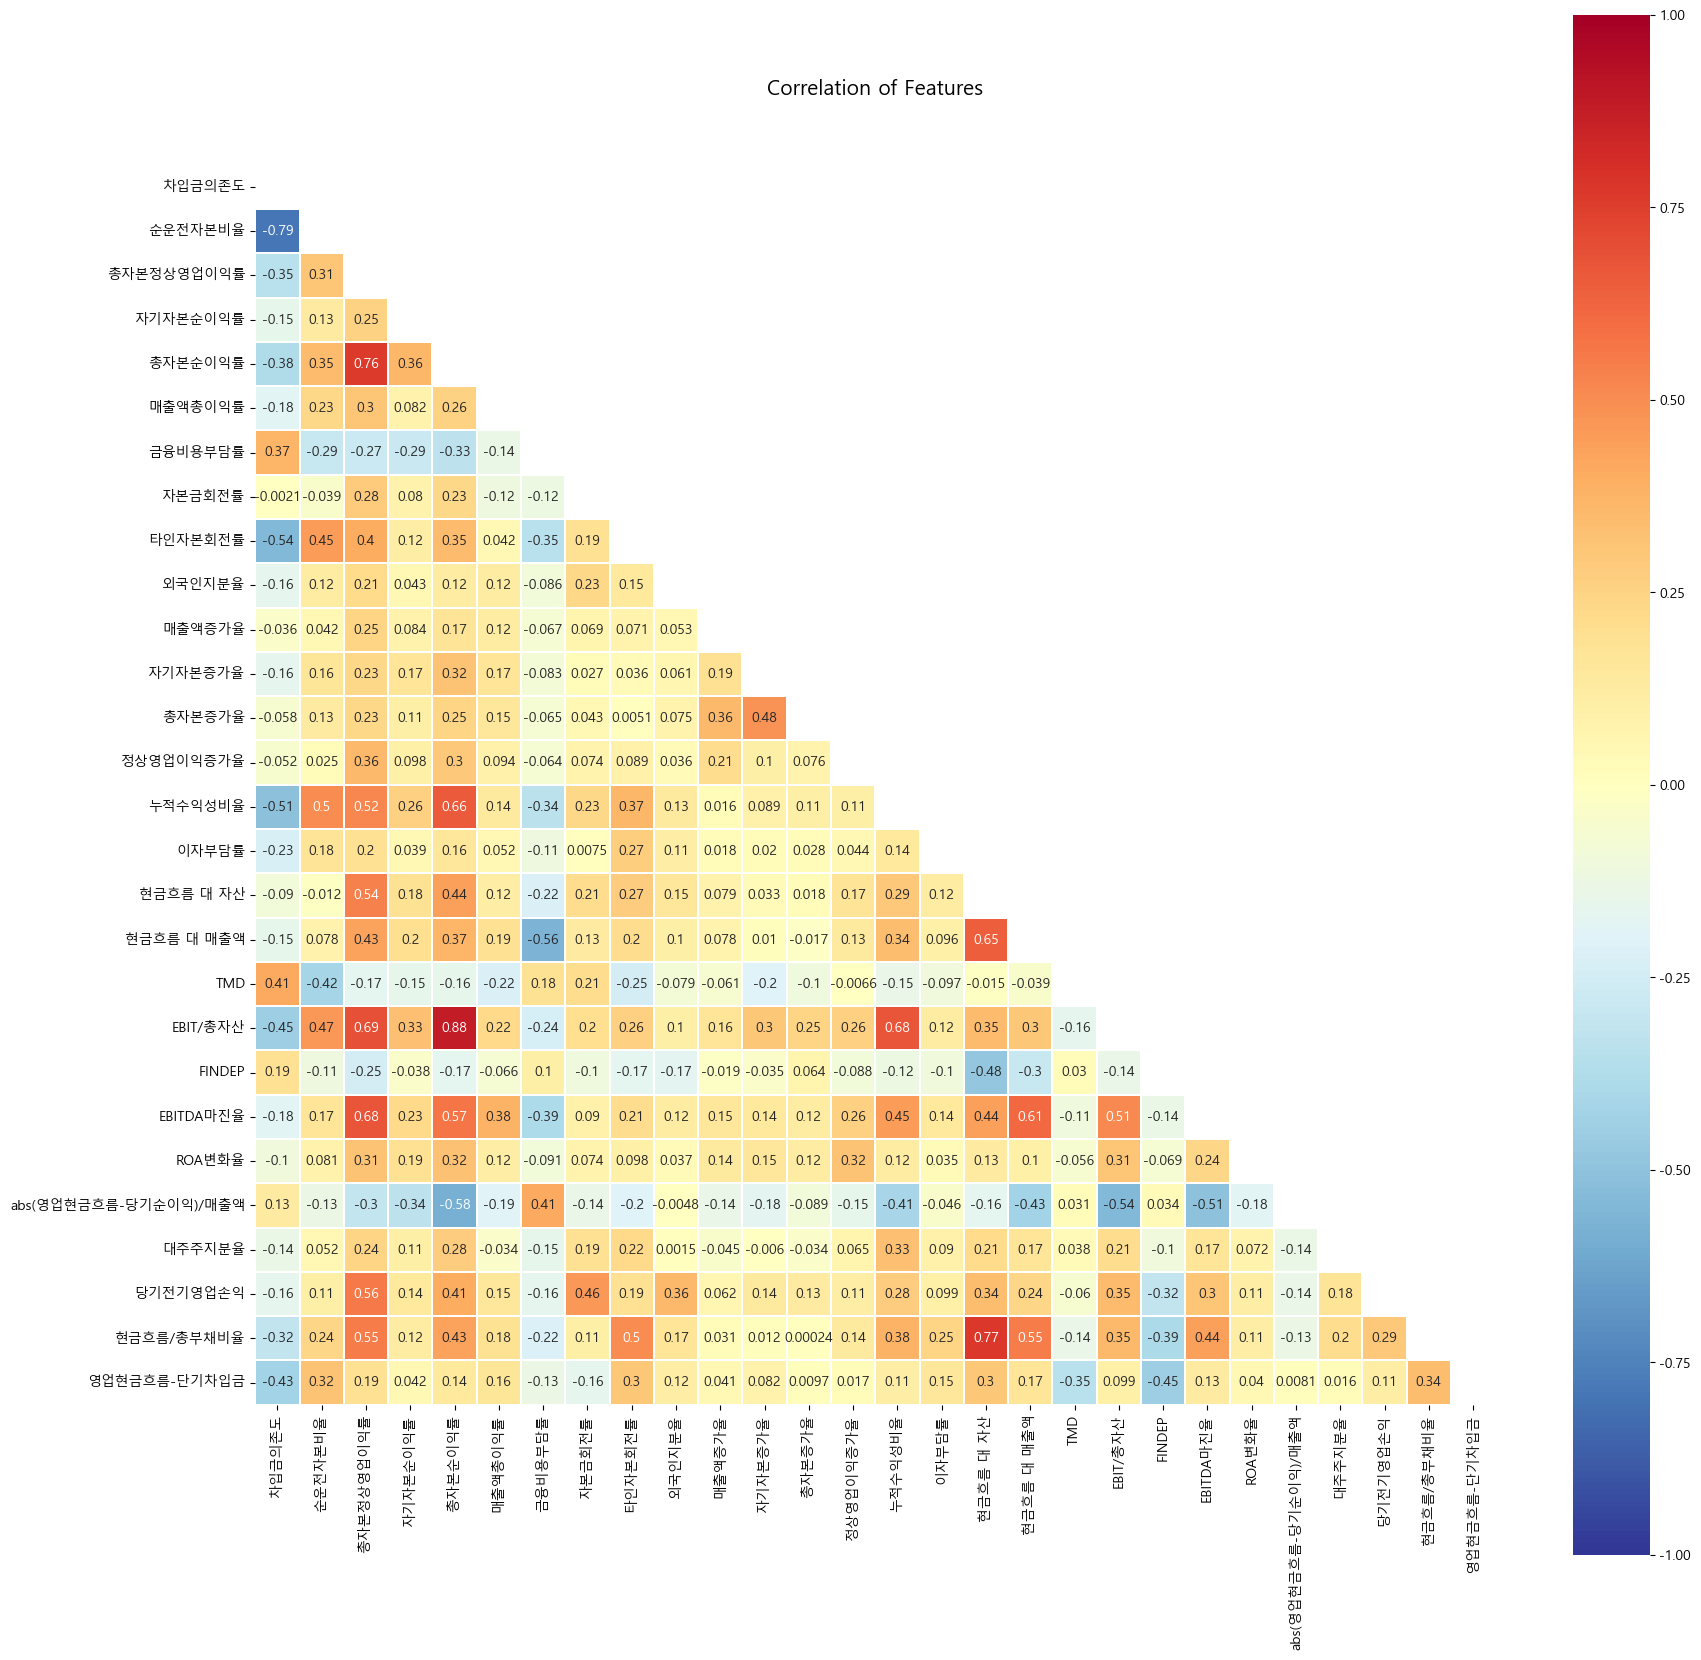

In [22]:
colormap = plt.cm.hot

corr = df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr,  linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,mask=mask,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})